# Read and visualise Files

## Import all the necessary libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

def get_file_name(var:str):
    return var[7:-4]

## Show datasets in folders

In [11]:
# Specify the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'

# Get a list of all items (files and directories) in the specified path
all_items = os.listdir(directory_path)

# Iterate over each item and check if it's a directory
for item in all_items:
    folder_path = os.path.join(directory_path, item)
    if os.path.isdir(folder_path):
        print(f"\nFolder: {item}")

        folder_contents = os.listdir(folder_path)
        for file in folder_contents:
            file_path = os.path.join(folder_path, file)
            print(f"    -> {file}")


Folder: Dataset_2024-06-20_12-40-28
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_gripper_2.csv
    -> true_no_lagged_graph_extendend.csv

Folder: Dataset_2024-06-20_16-26-23
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_gripper_2.csv
    -> true_no_lagged_graph_extendend.csv
    -> data_4_camera_1.csv
    -> Results

Folder: Dataset_2024-06-21_02-01-04
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_gripper_2.csv
    -> data_4_camera_1.csv
    -> data_5_camera_2.csv
    -> data_6_conveyor_1.csv
    -> data_7_conveyor_2.csv

Folder: Dataset_2024-06-21_18-27-11
    -> data_1_normal.csv

Folder: Dataset_2024-06-21_20-29-50
    -> data_1_normal.csv
    -> data_2_gripper_1.csv
    -> data_3_camera_1.csv


## Select folder to read

In [ ]:
folder_input = input("Please select folder.")

In [12]:
# Specify the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'
files = {}
folder = folder_input

folder_path = os.path.join(directory_path, folder)
if os.path.isdir(folder_path):
    print(f"Chosen folder: {item}")
    folder_contents = os.listdir(folder_path)
    for file in folder_contents:
        file_path = os.path.join(folder_path, file)
        print(f"-> {file}")
        if file[0:4] == 'data':
             files[f"{get_file_name(file)}"] = file_path

Chosen folder: Dataset_2024-06-21_20-29-50
-> data_1_normal.csv
-> data_2_gripper_1.csv
-> data_3_camera_1.csv


In [13]:
file_input = input("Please select file.")

In [14]:
file_selected = files[file_input]
file_selected

'G:\\My Drive\\Master Thesis\\Simulation\\Dataset\\Dataset_2024-06-21_20-29-50\\data_2_gripper_1.csv'

### Nodes

In [15]:
EoL_nodes = ['EoL_1_X', 'EoL_1_Y',
             'EoL_2_X', 'EoL_2_Y',
             'EoL_3_X', 'EoL_3_Y',
             'EoL_4_X', 'EoL_4_Y',
             'EoL_5_X','EoL_5_Y',
             'EoL_6_X', 'EoL_6_Y']

con_nodes = ['con_1','con_2','con_3']

rob_nodes = ['rob_1_1', 'rob_1_2','rob_1_3', 'rob_1_4',
             'rob_2_1', 'rob_2_2','rob_2_3', 'rob_2_4',
             'rob_1_maxVel', 'rob_1_gripper','rob_2_maxVel', 'rob_2_gripper']

cam_nodes = ['cam_1_X', 'cam_2_X', 'cam_3_X',
             'cam_1_Y', 'cam_2_Y', 'cam_3_Y']

## Normal Dataset

### End of line

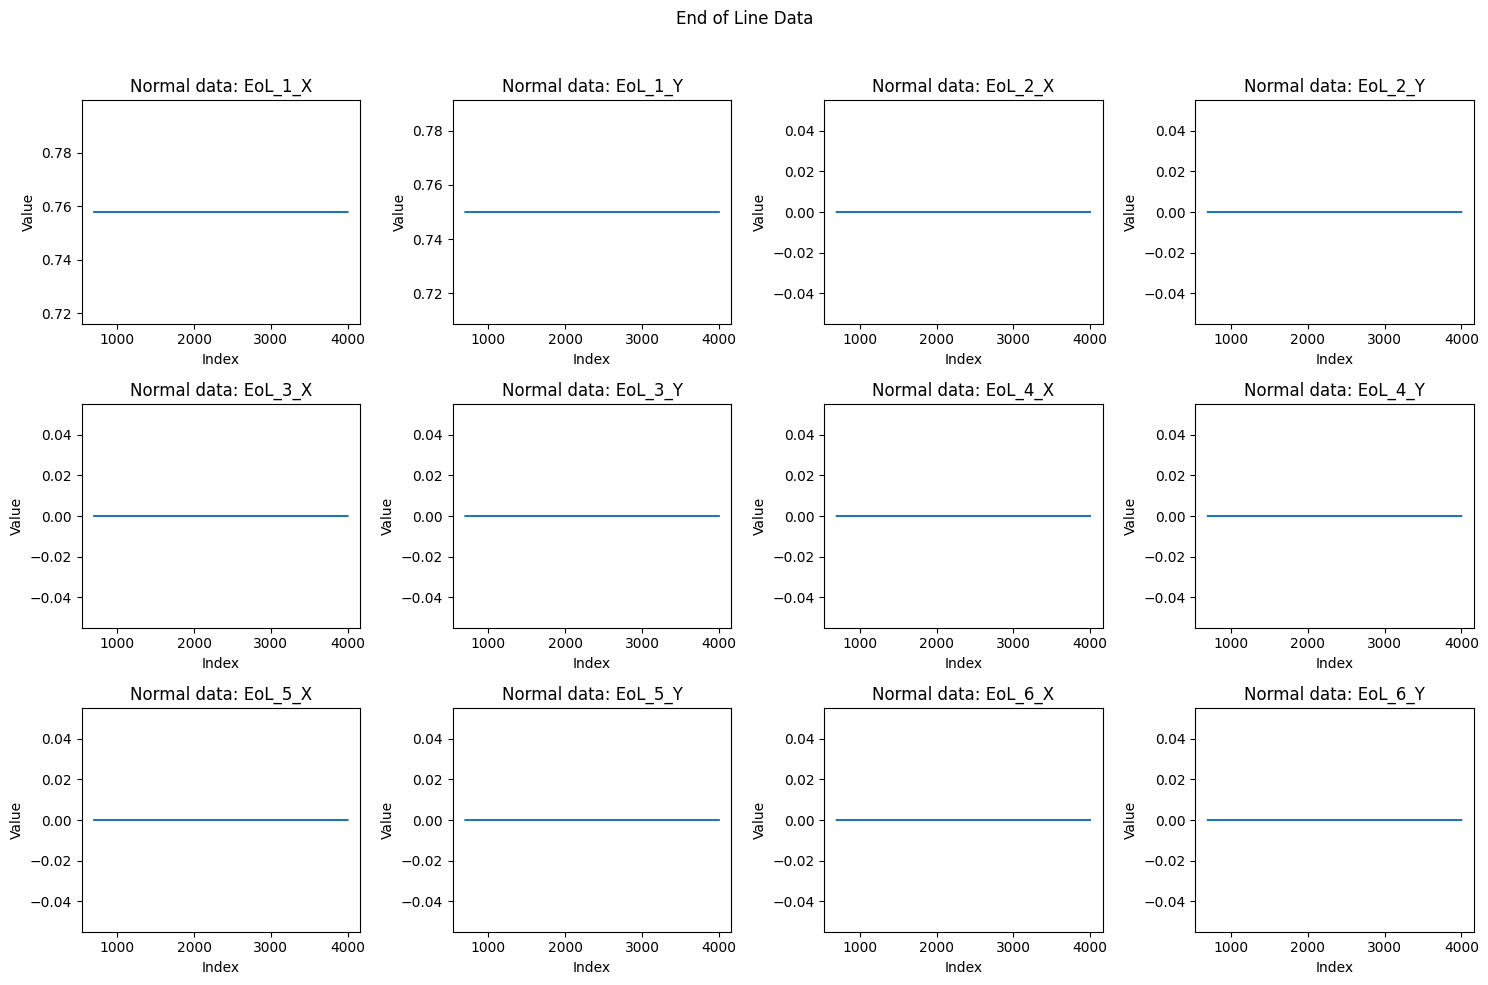

In [16]:
normal_data_df = pd.read_csv(file_selected)

normal_data_df.head()

EoL_data_df = normal_data_df[EoL_nodes]

fig, axes = plt.subplots(3,4, figsize=(15, 10))
fig.suptitle('End of Line Data')

for i, ax in enumerate(axes.flatten()):
    column =  EoL_data_df.columns[i]
    ax.plot(EoL_data_df[column][700:])
    ax.set_title(f'Normal data: {column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Conveyor

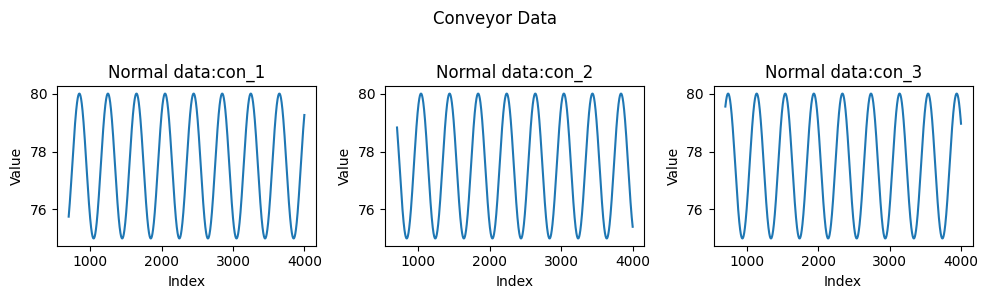

In [17]:
con_data_df = pd.read_csv(file_selected)

con_data_df.head()

con_data_df = con_data_df[con_nodes]

fig, axes = plt.subplots(1,3, figsize=(10, 3))
fig.suptitle('Conveyor Data')

for i, ax in enumerate(axes.flatten()):
    column =  con_data_df.columns[i]
    ax.plot(con_data_df[column][700:])
    ax.set_title(f'Normal data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Robots

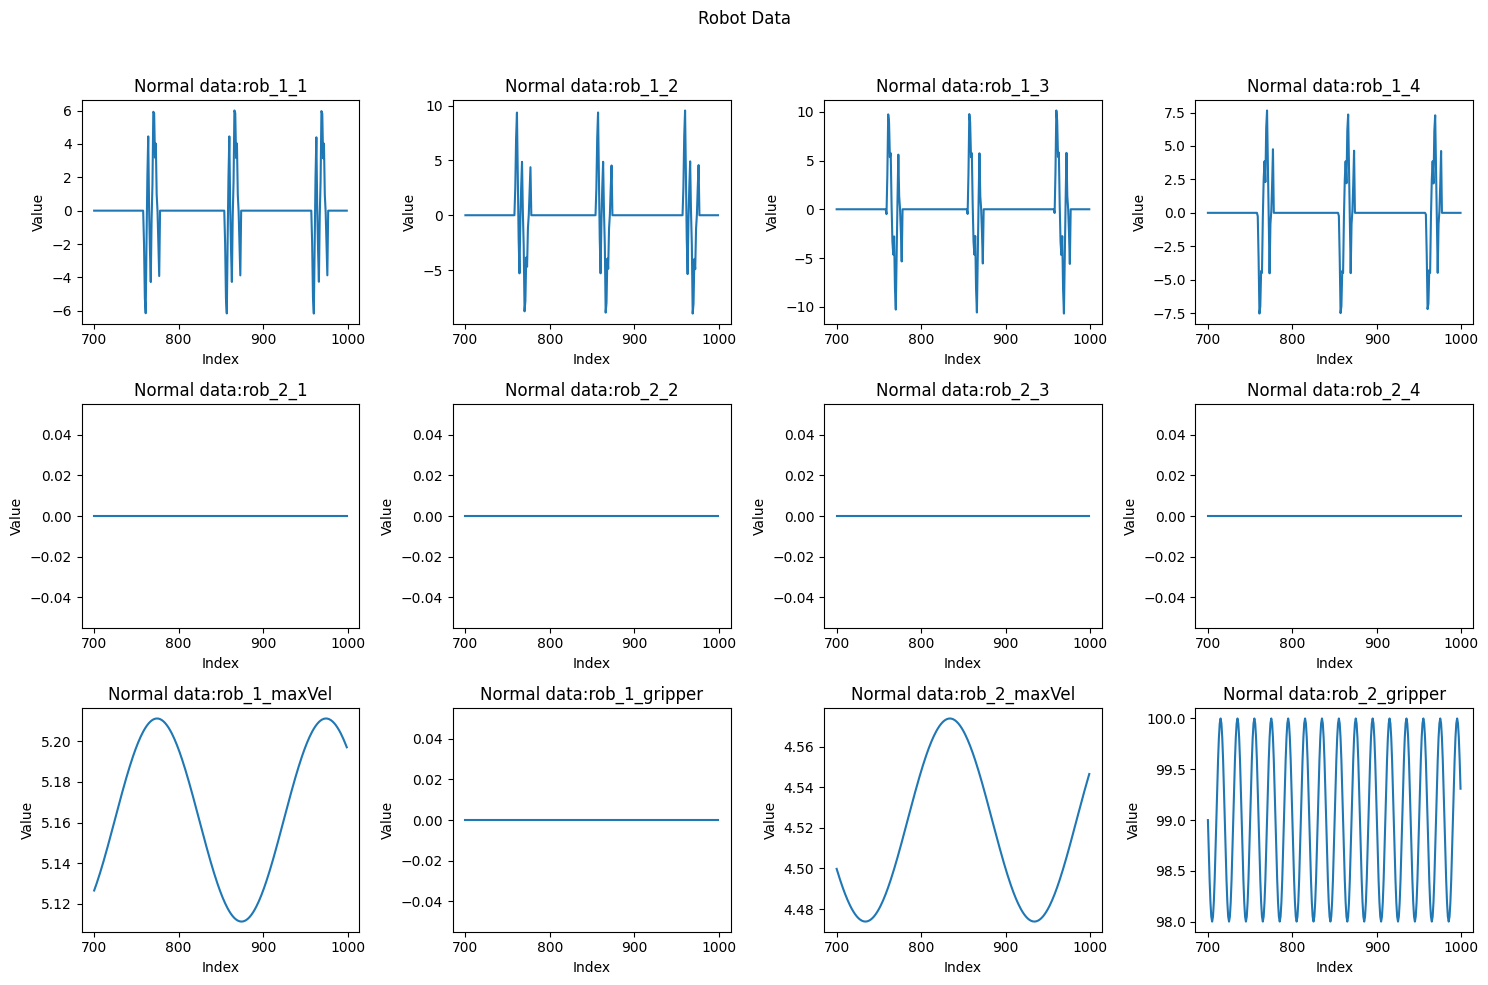

In [18]:
rob_data_df = pd.read_csv(file_selected)

rob_data_df.head()

rob_data_df = rob_data_df[rob_nodes]

fig, axes = plt.subplots(3,4, figsize=(15, 10))
fig.suptitle('Robot Data')

for i, ax in enumerate(axes.flatten()):
    column =  rob_data_df.columns[i]
    ax.plot(rob_data_df[column][700:1000])
    ax.set_title(f'Normal data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Cameras

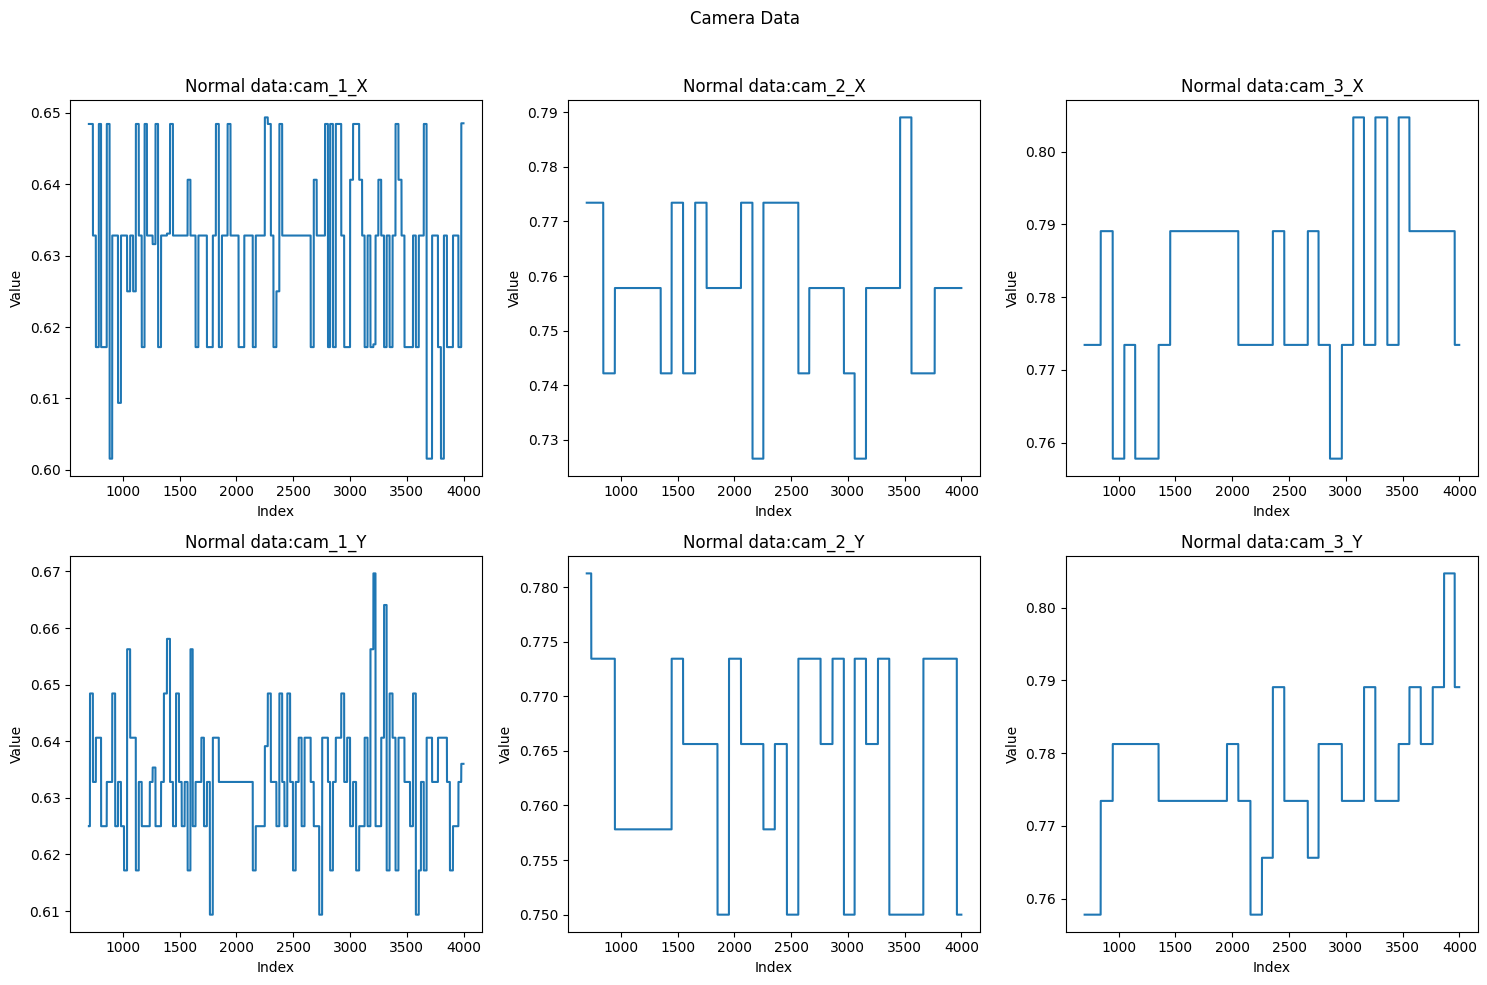

In [19]:
cam_data_df = pd.read_csv(file_selected)

cam_data_df.head()

cam_data_df = cam_data_df[cam_nodes]

fig, axes = plt.subplots(2,3, figsize=(15, 10))
fig.suptitle('Camera Data')

for i, ax in enumerate(axes.flatten()):
    column =  cam_data_df.columns[i]
    ax.plot(cam_data_df[column][700:])
    ax.set_title(f'Normal data:{column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()